## Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации.
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Ответить на вопрос, насколько такие фильмы интересны зрителю.

**Цель:** установление параметров и факторов влияющих на интерес зрителей по отношению к фильмам и кассовым сборам.

**Задачи:**

* Сколько фильмов выходило в прокат каждый год. 
* Какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
* Как эта доля менялась по годам.
* Какой период полнее всего представлен в данных о прокате в кинотеатрах.
* Как менялась динамика проката по годам. 
* В каком году сумма сборов была минимальной? А максимальной?
* С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. Сравните значения и сделайте выводы.
* Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? 
* Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? * Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

**Предмет исследования:** рынок российского кинопроката.

**Методы** которые мы применим в данном исследовании включают в себя: ознакомление, предобработку и исследовательский анализ данных.

**Структура проекта.** Проектная работа состоит из обзора и предобработки данных, затем следует изучение и исследовательский анализ данных.



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ознакомимся с датасетами

In [2]:
movies = pd.read_csv('/Users\Daniil\Downloads\mkrf_movies.csv')
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
shows = pd.read_csv('/Users\Daniil\Downloads\mkrf_shows.csv')
shows.sort_values(by='box_office').tail(5)

,puNumber,box_office
1377,121009217,2.118396e+09
759,111024918,2.271754e+09
1196,121005519,2.576614e+09
533,111011817,2.779686e+09
736,111021719,3.073569e+09


Приведем наименование колонок в обоих датасетах к snake_case:

In [4]:
movies = movies.rename(columns={'puNumber': 'pu_number'})
shows = shows.rename(columns={'puNumber': 'pu_number'})

Проверим типы данных в общем столбце датасетов перед соединением:

In [5]:

print(movies['pu_number'].dtypes)
print(shows['pu_number'].dtypes)

object
int64


Для объединения датасетов нам нужно привести тип данных в столбцах 'pu_number' к единому типу 'int'

In [6]:
movies['pu_number'].replace('нет', 0, inplace=True)
movies['pu_number'] = pd.to_numeric(movies['pu_number'], errors='coerce')

print(movies['pu_number'].dtypes)
print(shows['pu_number'].dtypes)

int64
int64


Теперь можем объеденить наши датасеты

In [7]:
df = movies.merge(shows, how='left', on='pu_number')
display(df.sort_values(by='box_office', ascending=False).head(3))
df.info()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7456,Холоп,111021719,2019-12-19T12:00:00.000Z,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,35000000.0,160000000.0,Фонд кино,6.8,комедия,3.073569e+09
5653,Движение вверх,111011817,2017-12-21T12:00:00.000Z,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,400000000.0,590192191.0,Фонд кино,7.5,"спорт,драма",2.779686e+09
6820,Мстители: Финал,121005519,2019-04-29T12:00:00.000Z,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"фантастика,боевик,драма",2.576614e+09


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Вывод 1

На первом шаге мы ознакомились с предоставленными датасетами, привели значения в общем столбце к одному типу и произвели объединение.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

При помощи метода .info() проверим типы данных и количество ненулевых значений

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Столбец 'show_start_date' приведем к типу datatime

In [9]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [10]:
df.isna().mean()

title                    0.000000
pu_number                0.000000
show_start_date          0.000000
type                     0.000000
film_studio              0.002404
production_country       0.000267
director                 0.001202
producer                 0.075875
age_restriction          0.000000
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
ratings                  0.129174
genres                   0.130377
box_office               0.578146
dtype: float64

Пропуски в столбцах: 'film_studio', 'production_country', 'director', 'producer', 'genres', 'box_office', 'financing_source' оставляем без изменений, достоверных данных чем их заполнить у нас нет.

Пропуски в столбцах: 'refundable_support', 'nonrefundable_support', 'budget', 'box_office' заменим на 0, отсутсвие финансирования или возвратной части господдержки или кассовых сборов вполне можно оценить как 0.

Пропуски в столбце 'ratings' трогать не будем, любое числовое значение влияет на общий рейтинг.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Явных дубликатов в датасете не обнаружено

In [11]:
df.duplicated().sum()

0

При проверке столбца 'producer' неявных дубликатов не обнаружили

In [12]:
df['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

При проверке столбца 'financing_source' неявных дубликатов не обнаружили

In [13]:
df['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Проверим уникальные значения столбца 'type'

In [14]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Мы обнаружили неявные дубликаты, одинаковые типы но содержащие пробелы, приведем их в нормальный вид используя метод .strip()

In [15]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Обнаружили различие в диапазонах в рейтингов - столбец 'ratings', скорее всего это рейтинг ожидания, актуальные данные по рейтингу нам взять не откуда, поэтому заполним на 'NaN'

In [16]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [17]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2,
       5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8,
       1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7,
       9. , 8.9, 9.1])

Данные в столбце 'genres' пока что не вызывают нареканий

In [18]:
df['genres'].head(20).unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама'], dtype=object)

Данные в столбце 'age_restriction' пока что не вызывают нареканий

In [19]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В столбце 'title' обнаружили множество данных с ненужными символами в конце строки, нужно проконсультироваться с отвественными за выгрузку, может быть связанно с человеским фактором, удалим ненужные символы применив метод str.strip()

In [20]:
df['title'] = df['title'].str.strip('.' '_' '/' '!' ' ' ',' '#')

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Для удобства восприятия данных, данные в столбцах: 'budget', 'refundable_support', 'nonrefundable_support', 'box_office' пересчитаем в миллионы с точностью до трех знаков дробной части

In [21]:
df[['budget', 'refundable_support', 'nonrefundable_support', 'box_office']] = round(df[['budget', 'refundable_support', 'nonrefundable_support', 'box_office']] / 10**6, 3)
df[['budget', 'refundable_support', 'nonrefundable_support', 'box_office']].sort_values(by='budget', ascending=False).head(10)

,budget,refundable_support,nonrefundable_support,box_office
7114,2305.074,180.0,90.000,333.597
5437,1032.906,110.0,190.000,511.776
7464,980.000,100.0,400.000,717.703
7474,944.000,100.0,400.000,NaN
7171,779.942,0.0,60.000,54.243
3351,684.201,150.0,300.000,364.285
2920,635.284,50.0,392.104,1402.255
5653,590.192,0.0,400.000,2779.686
6549,563.785,60.0,120.000,2271.754
3255,528.442,75.0,175.000,544.332


Датасет содержит 17 строк, в которых бюджет меньше суммы возвращаемой и не возвращаемой части финансирования, что противоречит логике:

In [22]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support'])].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10.234
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75.0,0.0,Фонд кино,6.6,драма,446.164
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10.0,70.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196.572
2532,Бармен,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67.419
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60.0,100.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184.488


Заполним эти строки суммой поддержки умноженной на коэфициент которые отражает в среднем по датасету во сколько раз в среднем бюджет больше поддержки:

In [23]:
df.loc[df['budget'] < (df['refundable_support'] + df['nonrefundable_support']), 'budget'] = \
    (df['refundable_support'] + df['nonrefundable_support']) * (df['budget'] / (df['refundable_support'] + df['nonrefundable_support'])).mean()

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [24]:
df['year_start_date'] = df['show_start_date'].dt.year
df['year_start_date'].head()

0    2015
1    2016
2    2016
3    2016
4    2015
Name: year_start_date, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [25]:
def string_separation (columns):
    columns['director'] = str(columns['director']).split(',')[0]
    columns['genres'] = str(columns['genres']).split(',')[0]
    return columns  
        
df[['main_director', 'main_genres']] = df[['director', 'genres']].apply(string_separation, axis=1)
df[['director', 'genres', 'main_director', 'main_genres']].head()           

,director,genres,main_director,main_genres
0,Кевин Костнер,"боевик,драма,мелодрама",Кевин Костнер,боевик
1,Е.Матвеев,"драма,военный",Е.Матвеев,драма
2,Тимур Бекмамбетов,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
3,Тимур Бекмамбетов,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика
4,Тимур Бекмамбетов,"фантастика,боевик,триллер",Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [26]:
df.loc[((df['budget'] > 0) & ((df['refundable_support'] > 0 ) | (df['nonrefundable_support'] > 0))), 'share_government_support'] = \
    round((df['refundable_support'] + df['nonrefundable_support']) / df['budget'], 2)

df.loc[((df['budget'] > 0) & ((df['refundable_support'] > 0 ) | (df['nonrefundable_support'] > 0)))].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_start_date,main_director,main_genres,share_government_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26.500,79.412,Министерство культуры,8.1,"драма,мелодрама",0.365,2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26.000,37.143,Министерство культуры,NaN,NaN,0.028,2014,А.Якимчук,nan,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107.848,176.023,Фонд кино,5.3,"комедия,фантастика",19.957,2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28.000,40.574,Министерство культуры,4.2,драма,0.056,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25.000,40.015,Министерство культуры,6.4,драма,0.232,2014,М.Угаров,драма,0.62


### Вывод 2
На втором шаге мы занимались предобработкой данных, исследовали наш датасет на явные и не явные дубликаты, добавляли расчетные колонки, изменяли типы данных, работали с пропусками в данных. 

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

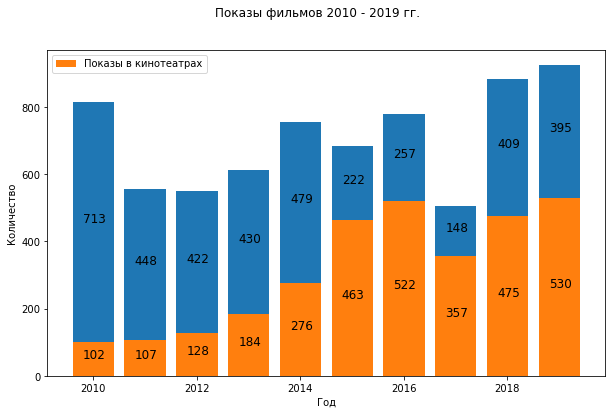

In [27]:
all_films_by_year = (df[['title', 'year_start_date', 'box_office', 'pu_number']]
                     .drop_duplicates(subset=['title', 'year_start_date'])
                     .groupby('year_start_date')['title']
                     .agg('count'))

all_films_by_year = (pd.DataFrame(all_films_by_year)
                     .reset_index()
                     .rename(columns={'year_start_date': 'year', 'title': 'qty'}))
                    
    
list_pu = shows['pu_number']

rental_in_movie_theaters_by_year = df.query('pu_number in @list_pu')
rental_in_movie_theaters_by_year = (rental_in_movie_theaters_by_year[['title', 'year_start_date', 'box_office', 'pu_number']]
                     .drop_duplicates(subset=['title', 'year_start_date'])
                     .groupby('year_start_date')['title']
                     .agg('count'))

rental_in_movie_theaters_by_year = (pd.DataFrame(rental_in_movie_theaters_by_year)
                     .reset_index()
                     .rename(columns={'year_start_date': 'year', 'title': 'qty'}))

data = rental_in_movie_theaters_by_year
names = list(rental_in_movie_theaters_by_year['year'])
values1 = list(rental_in_movie_theaters_by_year['qty'])
values2 = list(all_films_by_year['qty'])

fig, ax = plt.subplots(1, figsize=(10, 6), sharey=True)

for i in range(len(names)):
    ax.text(names[i]-0.2, values1[i]+ (values2[i] - values1[i])/2, values2[i] - values1[i], fontsize=12)
    ax.text(names[i]-0.2, values1[i]/2, values1[i], fontsize=12)
    
ax.set_ylabel('Количество')
ax.set_xlabel('Год')

ax.bar(names, values2)
ax.bar(names, values1, label='Показы в кинотеатрах')

ax.legend()

fig.suptitle('Показы фильмов 2010 - 2019 гг.');

Посмотрите, сколько фильмов выходило в прокат каждый год.


В 2010 году в прокат вышло всего 102 фильма. С 2011 по 2016 год количество фильмов вышедших в прокат увеличилось в пять раз до 522 фильмов в 2016 году, в 2017 году заметно снижение количества фильмов в прокате а так же уменьшение общего количества фильмов вышедших в этом году, за период 2018 - 2019 гг. доля фильмов в прокате вернулась к уровню 2016 года, но общее количество фильмов вышедших в 2019 году возросло и составило 925 фильмов.  

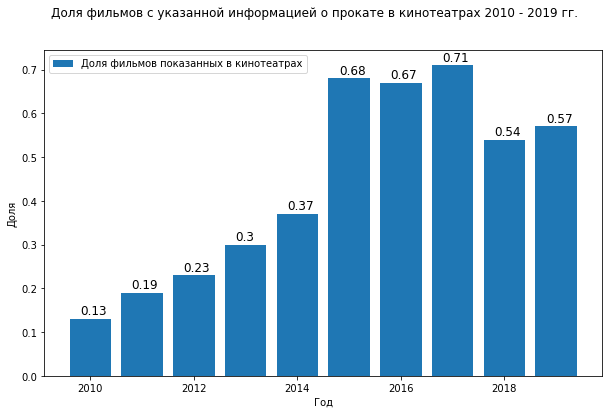

In [28]:
share_films_in_movie_theaters = all_films_by_year.merge(rental_in_movie_theaters_by_year, on='year')
share_films_in_movie_theaters['share'] = round(share_films_in_movie_theaters['qty_y'] /
                                               share_films_in_movie_theaters['qty_x'], 2)

data = share_films_in_movie_theaters
names = list(share_films_in_movie_theaters['year'])
values = list(share_films_in_movie_theaters['share'])

fig, ax = plt.subplots(1, figsize=(10, 6), sharey=True)

for i in range(len(names)): 
    ax.text(names[i]-0.2, values[i]+0.01, values[i], fontsize=12)
    
ax.set_ylabel('Доля')
ax.set_xlabel('Год')

ax.bar(names, values, label='Доля фильмов показанных в кинотеатрах')
ax.legend()

fig.suptitle('Доля фильмов с указанной информацией о прокате в кинотеатрах 2010 - 2019 гг.');

Доля фильмов с указанной информацией о прокате в кинотеатрах неуклонно растет, начиная с 2010 года она составляла всего 13 %, в период с 2010 - 2014 наблюдается стабильный равномерный рост до 37 процентов, 2015 - 2017 гг. она уже составляет около 70 %, затем в 2018 - 2019 годах доля уменьшилась до 54 и 57 процентов соответственно.

Cумма сборов была минимальной в 2010 году
Cумма сборов была максимальной в 2018 году


Text(0.5, 0.98, 'Кассовые сборы')

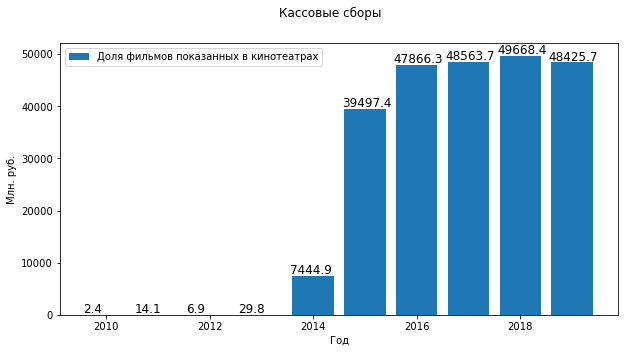

In [29]:
rental_dynamics_by_years = df.query('box_office > 0')
rental_dynamics_by_years = (rental_dynamics_by_years[['title', 'year_start_date', 'box_office', 'pu_number']]
                     .groupby('year_start_date')['box_office']
                     .agg(['sum', 'count', 'mean', 'median']))


rental_dynamics_by_years = (pd.DataFrame(rental_dynamics_by_years)
                     .reset_index()
                     .rename(columns={'year_start_date': 'year', 'title': 'qty'}))

rental_dynamics_by_years[['sum', 'mean', 'median']] = round(rental_dynamics_by_years[['sum', 'mean', 'median']], 4)


year_min_box_office = rental_dynamics_by_years.sort_values(by='sum')['year'][0]
year_max_box_office = (rental_dynamics_by_years.sort_values(by='sum', ascending=False).reset_index(drop=True))['year'][0]


print(f'Cумма сборов была минимальной в {year_min_box_office} году')
print(f'Cумма сборов была максимальной в {year_max_box_office} году')  


data = rental_dynamics_by_years
names = list(rental_dynamics_by_years['year'])
values = list(rental_dynamics_by_years['sum'])

fig, ax = plt.subplots(1, figsize=(10, 5), sharey=True)

for i in range(len(names)): 
    ax.text(names[i]-0.45, values[i]+400, round(values[i],1), fontsize=12)
    
ax.set_ylabel('Млн. руб.')
ax.set_xlabel('Год')


ax.bar(names, values, label='Доля фильмов показанных в кинотеатрах')
ax.legend()

fig.suptitle('Кассовые сборы')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Сумма сборов была минимальной в 2010 году. Судя по графику кассовых сборов, у нас имеется недостаток данных по кассовым сборам за период 2010 - 2014 гг., если отбросить эти не полноценные данные то минимальная сумма сборов была в 2015 году - медианное значение почти 4  млрд руб., а в 2016 году сумма приблизилась к 5 млрд. руб. а именно 4.786 млрд, 2017 - 2018 наблюдается рост сборов 4.856 и 4.966 соответственно, в 2019 году сумма кассовых сборов уменьшилась до 4.842 млрд. руб. В 2018 году сумма кассовых сборов была максимальной.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [48]:
display(rental_dynamics_by_years)

,age_restriction,sum,count,share
0,«0+» - для любой зрительской аудитории,1204.998,231,0.5
1,«12+» - для детей старше 12 лет,63225.587,504,26.2
2,«16+» - для детей старше 16 лет,76583.666,1029,31.7
3,«18+» - запрещено для детей,42974.723,863,17.8
4,«6+» - для детей старше 6 лет,57530.728,374,23.8


Медианные и средние значения кассовых сборов в разрезе годов сильно различаются, это связанно с тем что данные по кассовым сборам содержат очень много околонулевых и минимальных значений - треть значений о кассовых сборах меньше 1 миллиона рублей, с чем именно это связанно: с ошибками в данных или низких кассовых сборах точно не известно. Медианные и средние значения в целом следуют за динамикой полного годового финансирования.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

,year,«18+» - запрещено для детей,«6+» - для детей старше 6 лет,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«0+» - для любой зрительской аудитории
0,2015,5432.311,8701.802,13616.087,11368.117,379.052
1,2016,6793.930,12053.146,12204.447,16664.549,150.226
2,2017,9651.488,12086.143,7851.428,18745.043,229.599
3,2018,8760.086,10104.975,14267.290,16503.603,32.449
4,2019,10121.797,12852.546,12680.198,12753.417,17.746


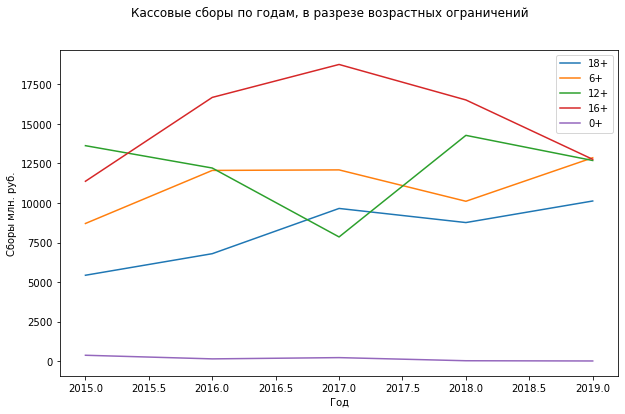

In [31]:
restriction_list = ['«18+» - запрещено для детей', 
                    '«6+» - для детей старше 6 лет',
                    '«12+» - для детей старше 12 лет',
                    '«16+» - для детей старше 16 лет',
                    '«0+» - для любой зрительской аудитории']
age_list = {'year': [2015, 2016, 2017, 2018, 2019]}

def age_restriction (restriction_list, age_list):
    
    table = pd.DataFrame(age_list)
    
    for restriction in restriction_list:
        rental_dynamics_by_years = df.query('(box_office != 0) and (age_restriction == @restriction) and (2015 <= year_start_date <= 2019)')
        rental_dynamics_by_years = (rental_dynamics_by_years[['year_start_date', 'box_office']]
                     .groupby('year_start_date')['box_office']
                     .agg('sum'))

        rental_dynamics_by_years = (pd.DataFrame(rental_dynamics_by_years)
                     .reset_index()
                     .rename(columns={'year_start_date': 'year', 'box_office': restriction}))
        
        table = table.merge(rental_dynamics_by_years, on='year')
        
        
    table['year']  = table['year'].astype('int') 
    table.reset_index(drop=True)      
    return table

t = age_restriction (restriction_list, age_list)

display(t)

data = t
names = t['year']

values0 = t['«18+» - запрещено для детей']
values1 = t['«6+» - для детей старше 6 лет']
values2 = t['«12+» - для детей старше 12 лет']
values3 = t['«16+» - для детей старше 16 лет']
values4 = t['«0+» - для любой зрительской аудитории']

fig, ax = plt.subplots(1, figsize=(10, 6))

ax.set_ylabel('Сборы млн. руб.')
ax.set_xlabel('Год')

ax.plot(names, values0, label='18+');
ax.plot(names, values1, label='6+');
ax.plot(names, values2, label='12+');
ax.plot(names, values3, label='16+');
ax.plot(names, values4, label='0+');

ax.legend()

fig.suptitle('Кассовые сборы по годам, в разрезе возрастных ограничений');

Судя по данным графика "Кассовые сборы по годам, в разрезе возрастных ограничений" расположенным выше, каждое возрастное ограничение имеет свою нищу кассовых сборов и влияет на сумму сборов фильма, мы наблюдаем падение кассовых сборов фильмов с возрастным ограничением 12+ с 2015 по 2017 гг. в тоже время наблюдается рост кассовых сборов фильмов с возрастным ограничением 16+ в 2017 году картина меняется наоборот: кассовые сборы фильмов с возрастным ограничением 12+ начинаю расти а 16+ падать, в итоге к 2019 году кассовые сборы фильмов с ограничениями 16+, 12+, 6+ сравнялись. Я думаю провал в 2017 году является следствием того что большая часть фильмов с поддержкой по бюджету в 2016 году не окупилась и режиссеры ушли в нишу 16+.

,age_restriction,sum,count,share
2,«16+» - для детей старше 16 лет,76583.666,1029,31.7
1,«12+» - для детей старше 12 лет,63225.587,504,26.2
4,«6+» - для детей старше 6 лет,57530.728,374,23.8
3,«18+» - запрещено для детей,42974.723,863,17.8
0,«0+» - для любой зрительской аудитории,1204.998,231,0.5


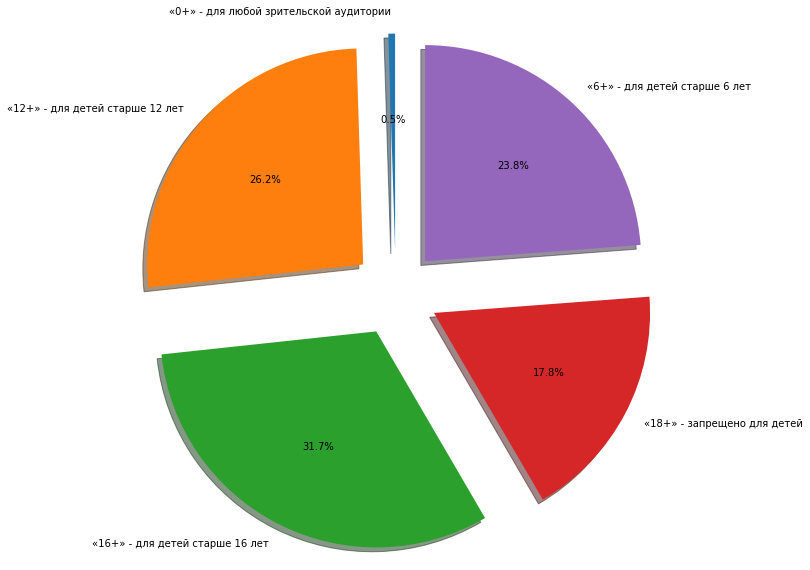

In [32]:
rental_dynamics_by_years = df[df['box_office'] > 0].groupby('age_restriction')['box_office'] \
    .agg(['sum', 'count'])

rental_dynamics_by_years = pd.DataFrame(rental_dynamics_by_years).reset_index()
rental_dynamics_by_years['share'] = round(rental_dynamics_by_years['sum'] / rental_dynamics_by_years['sum'].sum(), 3) * 100

display(rental_dynamics_by_years.sort_values(by='sum', ascending=False))


labels = rental_dynamics_by_years['age_restriction']
sizes = rental_dynamics_by_years['share']
explode = ( 0.2,  0.2, 0.2,  0.2,  0.2)

fig1, ax1 = plt.subplots(figsize=(10, 10))

ax1.pie(sizes, explode=explode, labels=labels , autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

Фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате 31.7 % от общих собранных средст или 7.6 млрд. руб, на втором месте идут фильмы с возрастным ограничением 12+ 26.2 % или 6.3 млрд. руб и наконец на третьем месте идут фильмы с возрастным ограничением 6+ которые собрали в прокате 5.7 млрд. руб.

Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

,year_start_date,count,sum,mean,median
0,2013,2,134,67,67
1,2014,16,572,35,27
2,2015,86,3656,42,30
3,2016,61,4303,70,35
4,2017,41,3183,77,40
5,2018,56,3446,61,45
6,2019,70,4904,70,40


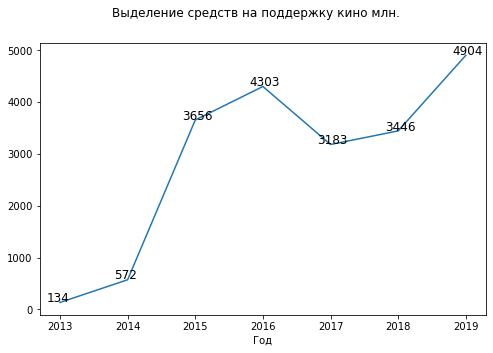

In [33]:
def total_support (row):
    if(row['refundable_support'] > 0) or (row['nonrefundable_support'] > 0):
        return row['refundable_support'] + row['nonrefundable_support']
    else:
        return 0
    
df['total_support'] = df.apply(total_support, axis=1)


total_support = df[df['total_support'] != 0]
total_support = (total_support
                     .groupby('year_start_date')['total_support']
                     .agg(['count','sum', 'mean', 'median']))
total_support = total_support.reset_index()
total_support[['sum', 'mean', 'median']] = total_support[['sum', 'mean', 'median']].astype('int')
                    
display(total_support)


data = total_support
names = total_support['year_start_date']
values = total_support['sum']

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(len(total_support)): 
    ax.text(names[i]-0.2, values[i]+10, round(values[i]), fontsize=12)
    
ax.set_xlabel('Год')
ax.plot(names, values)

fig.suptitle('Выделение средств на поддержку кино млн.');

Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

Если рассматривать период с 2014 по 2019 гг. сумма поддержки растет с каждым годом и в 2016 г. составляет  4.3 млрд. руб., затем в 2017 году сумма поддержки снижается до 3.1 млрд. руб. В 2018 и 2019 гг. рост возобновляется и в 2019 г. достигает своего максимума 4.9 млрд. руб

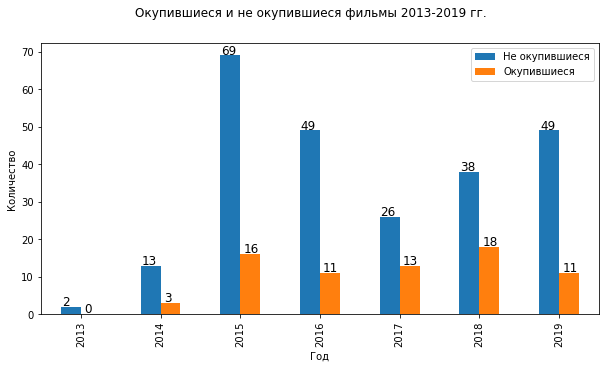

In [34]:
df.loc[((df['box_office'] >= 0) & (df['budget'] > 0)), ['payback']] = df['box_office'] /df['budget']

payback_films = df[(df['share_government_support'] > 0) & (df['box_office'] > 0) & (df['budget'] > 0)] \
                     .drop_duplicates(subset=['title', 'year_start_date']) \
                     .groupby(['year_start_date', df['payback'] >= 1]) \
                     .agg({'title' : 'count'}).unstack('payback').fillna(0).astype('int')

payback_films.plot(kind='bar', figsize=(10, 5), stacked=False, ylabel='Количество', xlabel='Год', use_index=True)
plt.legend(['Не окупившиеся', 'Окупившиеся'])
plt.suptitle('Окупившиеся и не окупившиеся фильмы 2013-2019 гг.')

names = list(payback_films.index)
values1 = list(payback_films['title', False])
values2 = list(payback_films['title', True])

for i in range(len(names)): 
    plt.text(i-0.24, values1[i]+0.4, values1[i], fontsize=12)
    plt.text(i+0.04, values2[i]+0.4, values2[i], fontsize=12);

In [35]:
payback_films.columns = ['no_payback', 'payback']
payback_films['share'] = round((payback_films['payback'] / (payback_films['no_payback'] + payback_films['payback']))*100, 2)
payback_films

,no_payback,payback,share
year_start_date,,,
2013,2,0,0.00
2014,13,3,18.75
2015,69,16,18.82
2016,49,11,18.33
2017,26,13,33.33
2018,38,18,32.14
2019,49,11,18.33


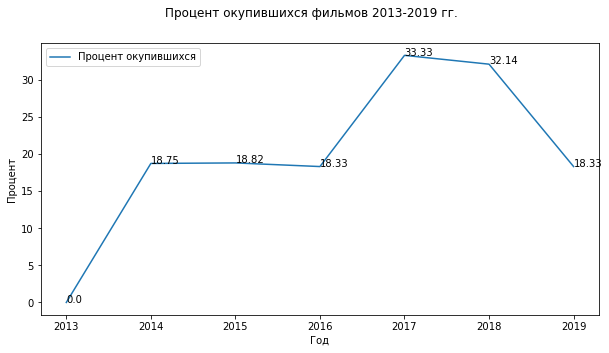

In [36]:
payback_films.plot(figsize=(10, 5), y='share', ylabel='Процент', xlabel='Год')
plt.legend(['Процент окупившихся'])
plt.suptitle('Процент окупившихся фильмов 2013-2019 гг.')

values1 = list(payback_films['share'])

for i in range(len(values1)): 
    plt.text(names[i], values1[i], values1[i], fontsize=10)    

Рассматривая окупаемость фильмов с господдержкой - мы приходим к выводу что дела обстоят не совсем радужно, в среднем только 23% от всех фильмов окупаются. В разрезе годов ситуация выглядит иначе: начиная с 2014 года в котором окупилось 20 % фильмов, наблюдается спад окупаемости в 2014 - 2015 гг. 16.5 и 15.8 % соответственно. Затем в 2017 году доля окупившихся фильмов с господдержкой возрастает до 35%, немного снижается в 2018 году до почти 33 процентов и устанавливается на отметке 18.6 % в 2019 году. 

Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?

,year,film_whith_support,mean_ratings_film_whith_support,median_ratings_film_whith_support,film_whithout_support,mean_ratings_film_whithout_support,median_ratings_film_whithout_support
0,2013,2,6.70,6.7,580,6.51,6.6
1,2014,15,6.01,6.4,724,6.53,6.7
2,2015,81,6.06,6.2,534,6.34,6.5
3,2016,56,5.76,5.9,654,6.40,6.6
4,2017,39,6.00,6.2,395,6.35,6.4
5,2018,53,6.00,6.2,603,6.41,6.5
6,2019,67,6.18,6.2,655,6.52,6.5


Средний рейтинг фильмов с господдержкой 6.0
Средний рейтинг фильмов без господдержки 6.5


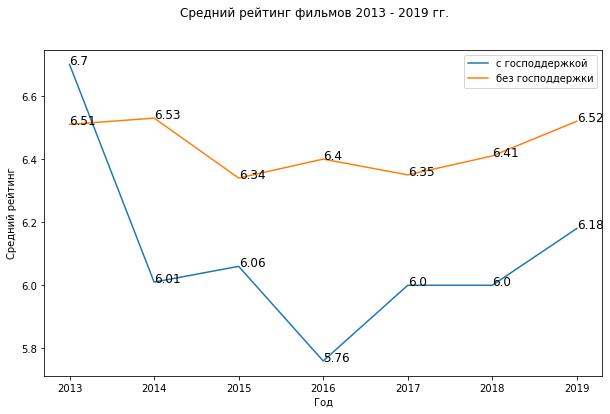

In [37]:
support = df.query('(share_government_support > 0) and (ratings > 1.0)')
no_support = df.query('(share_government_support != share_government_support) and (ratings > 1.0)')

raiting_support = support.groupby('year_start_date')['ratings'].agg(['count', 'mean', 'median'])
raiting_no_support = no_support.groupby('year_start_date')['ratings'].agg(['count', 'mean', 'median'])

total_raiting = raiting_support.merge(raiting_no_support, on='year_start_date')
#print(no_support)
total_raiting[['mean_x', 'mean_y']] = round(total_raiting[['mean_x', 'mean_y']], 2)
total_raiting = (total_raiting.reset_index()
                .rename(columns={'year_start_date': 'year',
                                 'count_x': 'film_whith_support',
                                 'mean_x': 'mean_ratings_film_whith_support',
                                 'median_x': 'median_ratings_film_whith_support',
                                 'count_y': 'film_whithout_support',
                                 'mean_y': 'mean_ratings_film_whithout_support',
                                 'median_y': 'median_ratings_film_whithout_support'}))


display(total_raiting)

total_raiting_support = round(support['ratings'].mean(), 1)
print(f'Средний рейтинг фильмов с господдержкой {total_raiting_support}')

total_raiting_no_support = round(no_support['ratings'].mean(), 1)
print(f'Средний рейтинг фильмов без господдержки {total_raiting_no_support}')


names = total_raiting['year']
values1 = total_raiting['mean_ratings_film_whith_support']
values2 = total_raiting['mean_ratings_film_whithout_support']

fig, ax = plt.subplots(1, figsize=(10, 6))

for i in range(len(names)): 
    ax.text(names[i], values1[i], values1[i], fontsize=12)
    ax.text(names[i], values2[i], values2[i], fontsize=12)

    
ax.set_ylabel('Средний рейтинг')
ax.set_xlabel('Год')

ax.plot(names, values1, label='с господдержкой');
ax.plot(names, values2, label='без господдержки');


ax.legend()

fig.suptitle('Средний рейтинг фильмов 2013 - 2019 гг.');

Рассмотрев график среднего рейтинга фильмов 2013 - 2019 гг. приходим к выводу что фильмы с госсподдержкой в среднем получают оценки на 0.4 балла меньше чем фильмы без господдержки по десятибальной шкале.

In [38]:
payback = df[df['payback'] >= 1]
t = payback[['title', 'director', 'budget', 'box_office', 'payback']].sort_values(by='payback', ascending=False).head(3)
t

,title,director,budget,box_office,payback
7456,Холоп,К.Шипенко,160.000,3073.569,19.209806
5708,Лёд,О.Трофим,148.585,1445.732,9.730000
5749,Я худею,А.Черномазов (псевдоним Алексей Нужный),87.649,633.462,7.227259


Бесспорным лидером окупаемости является фильм "Холоп" режиссера К.Шипенко, который собрал в прокате 3 млрд. рублей при производственном бюджете 160 млн. руб., окупаемость этого фильма по отношению к бюджету 19 раз. Второю строчку топ-а окупаемых фильмов заняла картина "Лёд" режиссера О.Трофима с результатом по окупаемости 9.7 раза. И на третьем месте картина "Я худею" 7.2 раза - вполне неплохой результат.

In [39]:
t = df[['title', 'director', 'budget', 'box_office', 'payback']].sort_values(by='box_office', ascending=False).head(10)
t

,title,director,budget,box_office,payback
7456,Холоп,К.Шипенко,160.000,3073.569,19.209806
5653,Движение вверх,А.Мегердичев,590.192,2779.686,4.709800
6820,Мстители: Финал,"Джо Руссо, Энтони Руссо",NaN,2576.614,NaN
6549,Т-34,А.Сидоров,563.785,2271.754,4.029469
3488,Пираты Карибского моря: Мертвецы не рассказыва...,"Йоаким Реннинг, Эспен Сандберг",NaN,2118.396,NaN
2859,Зверополис,"Рич Мур, Байрон Ховард",NaN,2048.126,NaN
3755,Тайная жизнь домашних животных. Миньоны против...,Крис Рено,NaN,1971.005,NaN
6274,Веном,Рубен Флейшер,NaN,1913.258,NaN
7216,Малефисента: Владычица тьмы,Йоаким Роннинг,NaN,1911.945,NaN
7258,Джокер,Тодд Филлипс,NaN,1890.368,NaN


Топ 10 фильмов с самыми большими кассовыми сборами открывает картина К.Шипенко "Холоп" с результатом чуть более 3 млрд. рублей, на втором месте расположилась картина "Движение вверх" режиссера А.Мегердичева которая собрала в кинопрокате 2.7 млрд. рублей.

In [40]:
top5_director = payback.groupby(['director'])['box_office'].agg(['sum']).sort_values(by='sum', ascending=False).head(5)

display(top5_director)

,sum
director,
К.Шипенко,3826.249
А.Мегердичев,2779.686
Д.Дьяченко,2404.899
А.Сидоров,2271.754
О.Трофим,1445.732


Пятерку режиссеров фильмы которых собрали наибольшее количество кассовых сборов возглавляет К.Шипенко почти 4 млрд. руб, на втором месте А.Мегердичев 2.7 млрд. руб., на третьем Д.Дьяченко которые снял множество картин ("Супербобровы", "Кухня в Париже", "О чем еще говорят мужчины") 2.4 млрд. руб.

,year,payback_film_count,payback_film_mean,payback_film_median,no_payback_film_count,no_payback_film_mean,no_payback_film_median
0,2014,3,5.83,6.00,12,6.05,6.40
1,2015,16,6.53,6.45,64,5.94,6.10
2,2016,11,5.75,5.60,45,5.63,6.00
3,2017,13,6.12,6.40,24,5.92,6.15
4,2018,17,5.92,6.40,36,6.04,6.20
5,2019,11,6.44,6.70,47,6.18,6.20


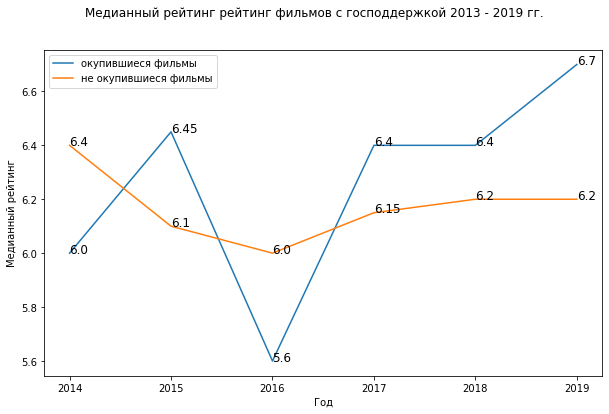

In [41]:
payback_films = df.query('(share_government_support > 0) and (payback > 1.0)').sort_values(by='ratings', ascending=False)
no_payback_films = df.query('(share_government_support > 0) and (payback < 1.0)').sort_values(by='ratings', ascending=False)

payback_films = payback_films.groupby(['year_start_date'])['ratings'].agg(['count', 'mean', 'median'])
no_payback_films = no_payback_films.groupby(['year_start_date'])['ratings'].agg(['count', 'mean', 'median'])

all_payback = payback_films.merge(no_payback_films, how='left', on='year_start_date')
all_payback = (all_payback.reset_index()
                          .rename(columns={'year_start_date': 'year',
                                           'count_x': 'payback_film_count',
                                           'mean_x': 'payback_film_mean',
                                           'median_x': 'payback_film_median',
                                           'count_y': 'no_payback_film_count',
                                           'mean_y': 'no_payback_film_mean',
                                           'median_y': 'no_payback_film_median'}))
all_payback[['payback_film_mean', 'payback_film_median', 'no_payback_film_mean', 'no_payback_film_median']] = round(all_payback[['payback_film_mean', 'payback_film_median', 'no_payback_film_mean', 'no_payback_film_median']], 2)

display(all_payback)

names = all_payback['year']
values1 = all_payback['payback_film_median']
values2 = all_payback['no_payback_film_median']

fig, ax = plt.subplots(1, figsize=(10, 6))

for i in range(len(names)): 
    ax.text(names[i], values1[i], values1[i], fontsize=12)
    ax.text(names[i], values2[i], values2[i], fontsize=12)

    
ax.set_ylabel('Медианный рейтинг')
ax.set_xlabel('Год')

ax.plot(names, values1, label='окупившиеся фильмы');
ax.plot(names, values2, label='не окупившиеся фильмы');


ax.legend()

fig.suptitle('Медианный рейтинг рейтинг фильмов с господдержкой 2013 - 2019 гг.');

Окупившиеся фильмы как правило имеют рейтинг выше чем не окупившиеся фильмы, и те и другие получают государственную поддержку, но так было не всегда. Возьмем к примеру 2014 год в котором картина была противоположной: окупившиеся фильмы тогда имели более низкий рейтинг по сравнению с не окупившимися 6.0 против 6.4 балла, в 2015 году ситуация изменилась - рейтинги почти сравнялись 6.3 балла и 6.2 балла соответсвенно. 2016 г. оказался провальным как для фильмов с поддержкой так и без. В период с 2017 по 2019 гг. ситуация вновь изменилась: окупившиеся фильмы стали набирать более высокий рейтинг чем не окупившиеся 6.4, 6.5, 6.7 баллов в этом периоде получали окупившиеся фильмы и 6.1, 6.3, 6.2 баллов для не окупившихся.

In [42]:
top5_support_studio = df.loc[(df['share_government_support'] > 0)] \
    .groupby('film_studio')['total_support'].agg(['count', 'sum']).astype('int').sort_values(by='count', ascending=False)
display(top5_support_studio.head())

,count,sum
film_studio,,
"ООО ""Студия анимационного кино ""Мельница""",7,630
"ООО ""Кинокомпания ""СТВ""",6,190
"ООО ""ТаББаК""",6,688
"ООО ""Киностудия ""ВЕРТИКАЛЬ""",4,143
"ООО ""ВИЗАРТ ФИЛЬМ""",4,470


Выше представлено топ-5 киностудий которые чаще всего получают поддержку

In [43]:
top5_main_genres = df[['main_genres', 'total_support']].groupby(['main_genres', df['total_support'] > 0 ]) \
    .agg(['count', 'sum']).unstack(level='total_support')
top5_main_genres['share'] = round(top5_main_genres[('total_support', 'count', True)] / top5_main_genres[('total_support', 'count', False)], 2)
top5_main_genres = top5_main_genres.sort_values(by=('total_support', 'sum', True), ascending=False).head()
top5_main_genres.columns = top5_main_genres.columns.get_level_values(1)
top5_main_genres.columns = ['no_support_count', 'support_count', 'no_support_sum', 'support_sum', 'share']
top5_main_genres = top5_main_genres.drop(columns = ['no_support_sum'], axis = 1)
top5_main_genres[['support_count', 'no_support_count', 'support_sum']] = \
    top5_main_genres[['support_count', 'no_support_count', 'support_sum']].astype('int')

display(top5_main_genres)

,no_support_count,support_count,support_sum,share
main_genres,,,,
драма,1595,93,5314,0.06
комедия,623,74,3218,0.12
мультфильм,507,31,2461,0.06
фантастика,399,11,1406,0.03
фэнтези,347,11,1032,0.03


Самый распростараненный жанр - драма, он же получает наибольшую сумму поддержки, а наибольшая доля поддержки у комедий.

In [44]:
top5_support_studio = df.loc[(df['share_government_support'] > 0)] \
    .groupby('director')['total_support'].agg(['count', 'sum'])
display(top5_support_studio.sort_values(by='count', ascending=False).astype('int').head())

,count,sum
director,,
Р.Давлетьяров,4,352
Д.Дьяченко,4,351
С.Андреасян,4,325
С.Мокрицкий,3,202
Н.Хомерики,3,660


топ-5 режисеров получающих поддержку

In [45]:
top5_loss_studio = df.loc[(df['budget'] > df['box_office']) & (df['budget'] >0)] \
    .groupby('film_studio')[['box_office', 'budget']].agg(['sum'])
top5_loss_studio['loss'] = top5_loss_studio['box_office', 'sum'] - top5_loss_studio['budget', 'sum']

display(top5_loss_studio.sort_values(by=('loss', ''), ascending=True).astype('int').head())

,box_office,budget,loss
,sum,sum,
film_studio,,,
"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""РФГ""; АО ""Маринс Групп Интертеймент""; ООО ""Фетисов Иллюзион""; ИП Петрухин; Чайна Филм Ко., Лтд.; Чайна Интернэшнл Филм & Медиа Корп., Лтд., Спаркл Ролл Медиа Корпорейшн, Лтд.",333,2305,-1971
"ООО ""Нон-Стоп Продакшн""",508,1405,-896
"НО Фонд Андрея Кончаловского по поддержке кино и сценических искусств, ООО ""Жан Виго Италия"" (Jean Vigo Italia S.R.L.)",54,779,-725
"ООО ""ВИЗАРТ ФИЛЬМ""",325,935,-610
"ООО ""ТПО ""РОК"", ООО ""Матильда""",511,1032,-521


Топ-5 студий по максимальному убытку

In [46]:
top5_loss_main_director = df.loc[(df['budget'] > df['box_office']) & (df['budget'] > 0)] \
    .groupby('main_director')[['box_office', 'budget']].agg(['sum'])
top5_loss_main_director['loss'] = top5_loss_main_director['box_office', 'sum'] - top5_loss_main_director['budget', 'sum']

display(top5_loss_main_director.sort_values(by=('loss', ''), ascending=True).astype('int').head())

,box_office,budget,loss
,sum,sum,
main_director,,,
О.Степченко,333,2305,-1971
А.Михалков (псевдоним А.Кончаловский),54,779,-725
А.Учитель,511,1032,-521
Р.Давлетьяров,50,549,-499
Н.Хомерики,392,883,-490


Топ-5 режисеров получивших максимальные убытки, обратим внимание на Р.Давлетьярова который 4 раза получал поддержку, стоит задуматься о предоставлении ему поддержки в пятый раз

In [47]:
top5_loss_genres = df.loc[(df['budget'] > df['box_office']) & (df['budget'] > 0)] \
    .groupby('main_genres')[['box_office', 'budget']].agg(['sum'])
top5_loss_genres['loss'] = (top5_loss_genres['box_office', 'sum'] - top5_loss_genres['budget', 'sum'])

display(top5_loss_genres.sort_values(by=('loss', ''), ascending=True).astype('int').head())

,box_office,budget,loss
,sum,sum,
main_genres,,,
драма,1578,7223,-5644
мультфильм,1719,4777,-3057
комедия,979,3484,-2504
приключения,661,2788,-2127
фэнтези,894,2298,-1403


Как печально бы это не звучало но убытки максимальны в жанре драма

### Шаг 5. Напишите общий вывод

В этом исследовании мы проанализировали Российский рынок кинопроката и постарались ответить на поставленные вопросы. 

Наш анализ начался с ознакомления с двумя датасетами, первый содержал общую информацию о фильмах а второй информацию о номерах прокатных удостоверений кинотеатров и сумму кассовых сборов. Мы соединили вышеуказанные датасеты по колонке номера прокатного удостоверения для дальнейшего анализа. Затем мы проверили наш датасет на явные дубликаты и не явные дубликаты, привели данные к нужным нам типам, добавили расчетные колонки, обработали категоральные столбцы. 

Проведя исследовательский анализ данных мы проанализировали количество фильмов которые выходили в прокат в период с 2011 - 2019 гг. заметили снижение количества кинокартин в 2017 гг. Мы увидели что доля фильмов с указанной информацией о прокате в кинотеатрах неуклонно растет, также нам удалось выяснить что период с 2015 - 2019 гг. эта доля представленна наиболее подробно.


Также нам удалось установить что в 2015 году сумма сумма кассовх сборов была максимальной, а в 2018 году сумма кассовых сборов была максимальной. С помощью сводной таблицы мы посчитали среднюю и медианную сумму сборов для каждого года а также пришли к выводу что медианные и средние значения в целом следуют за динамикой полного годового финансирования. 

Нам удалось узнать что каждое возрастное ограничение имеет свою нищу кассовых сборов и влияет на сумму сборов фильма и фильмы с возрастным ограничением 16+ собрали больше всего денег в прокате.

На последок мы установили что: самый распростараненный жанр он же получающий максимальную сумму господдержки - драма, драма также является самым убыточным жанром, каким жанрам чаще выделяют поддержку, студиям и режиссерам и посчитали общий убыток.

Подводя итоги исследования хочется добавить что в 2016-2017 года происходит становление Российский рынка кинопроката, 2016г. является кризисным для Российского кинематографа, в этом году вышло очень мало интересных картин, в тоже время с этого года изменилось отношение правительства к иностранным фильмам - на рынке решили ограничить кинопоказы зарубежных фильмов, сначала рынок отреагировал а это падением но в последующих годах восстановился и даже стал расти: как в отношении среднего рейтинга так и отношении кассовых сборов.
